<div class="alert alert-info">
    <h1>Analysis of Saturn's F Ring During the Cassini Mission</h1>
    <h1>Compute the F Ring's Phase Curve and Look for Time Variation</h1>

Robert S. French, rfrench@seti.org - Last updated April 10, 2024

Research performed under NASA Grant 80NSSC21K0527 for CDAP proposal "The Recent History of Saturn's Dusty Rings".
</div>


In [1]:
import colorsys
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import numpy.ma as ma 
import pandas as pd
import sys
if '..' not in sys.path: sys.path.append('..'); sys.path.append('../external')
    
from f_ring_util.f_ring import (add_hover,
                                compute_corrected_ew, 
                                fit_hg_phase_function, 
                                hg_func,
                                limit_by_quant,
                                print_hg_params,
                                read_ew_stats,
                                scale_hg_phase_function)

%matplotlib widget
mpl.rcParams['figure.max_open_warning'] = 100
mpl.rcParams['figure.figsize'] = (10.5, 5)

# Utility Functions

In [2]:
def fill_in_missing_long(x, y):
    # This only works for cases where the longitudes are 1 degree apart
    new_x = np.arange(360.)
    new_y = ma.empty(new_x.shape)
    new_y[:] = ma.masked
    new_y[x.astype(int)] = y
    return new_x, new_y

def plot_color(n, of):
    return colorsys.hsv_to_rgb(n/(of-1)*2/3, 1, .75)

In [3]:
obsdata_0_1 = read_ew_stats('../data_files/cass_ew_0_1.csv',
                            obslist_filename='CASSINI_OBSERVATION_LIST',
                            obslist_column='For Photometry')

** SUMMARY STATISTICS - ../data_files/cass_ew_0_1.csv **
Unique observation names: 212
Total slices: 39129
Starting date: 2004-06-20 19:15:28
Ending date: 2017-09-07 21:51:55
Time span: 4827 days 02:36:27


# Plot All Phase-Normalized EW Profiles to Look for Clumps

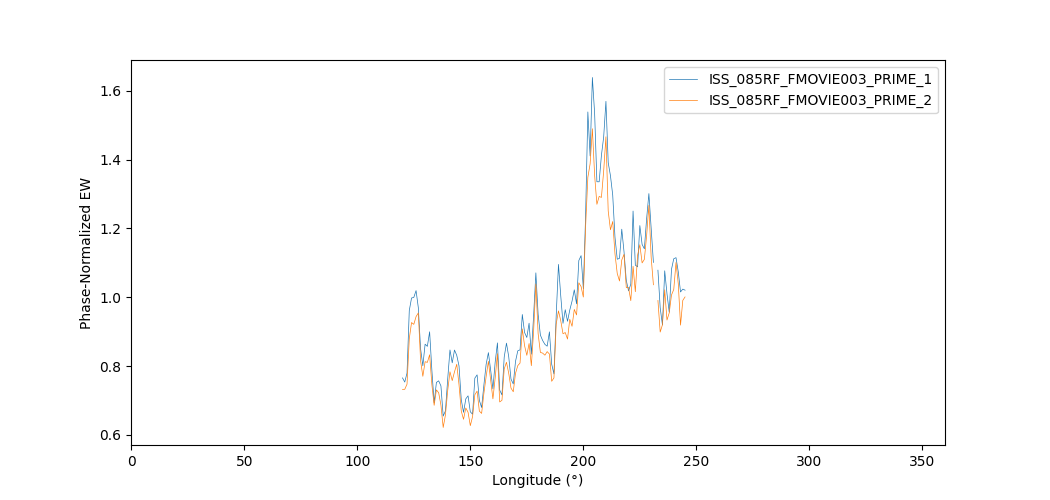

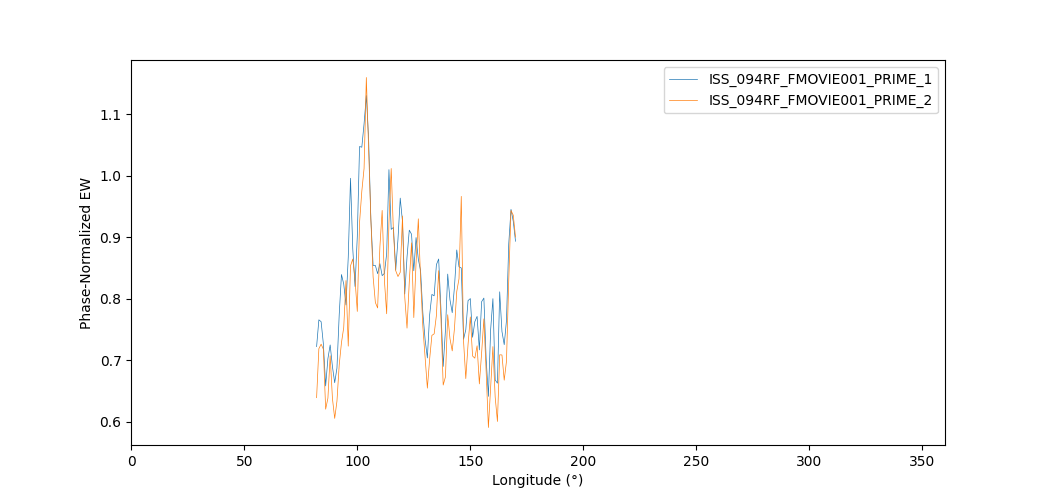

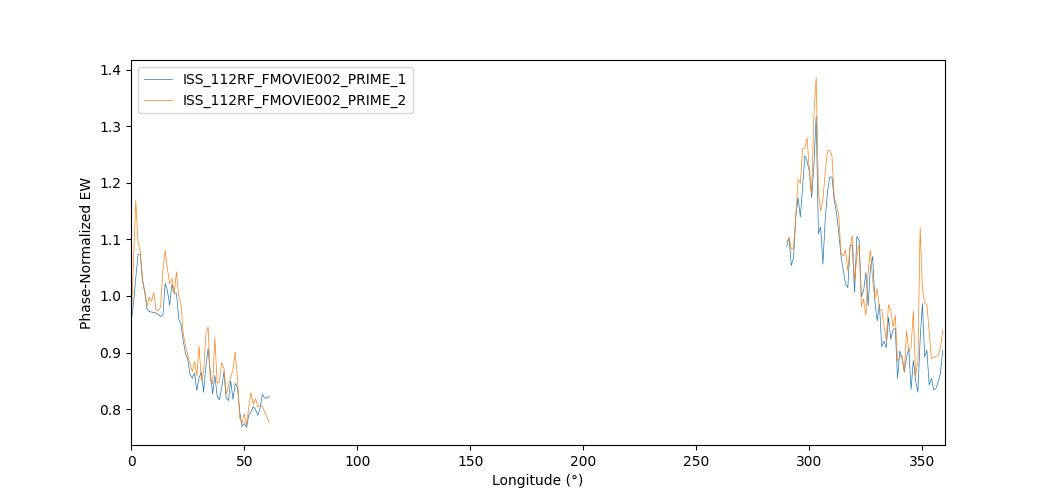

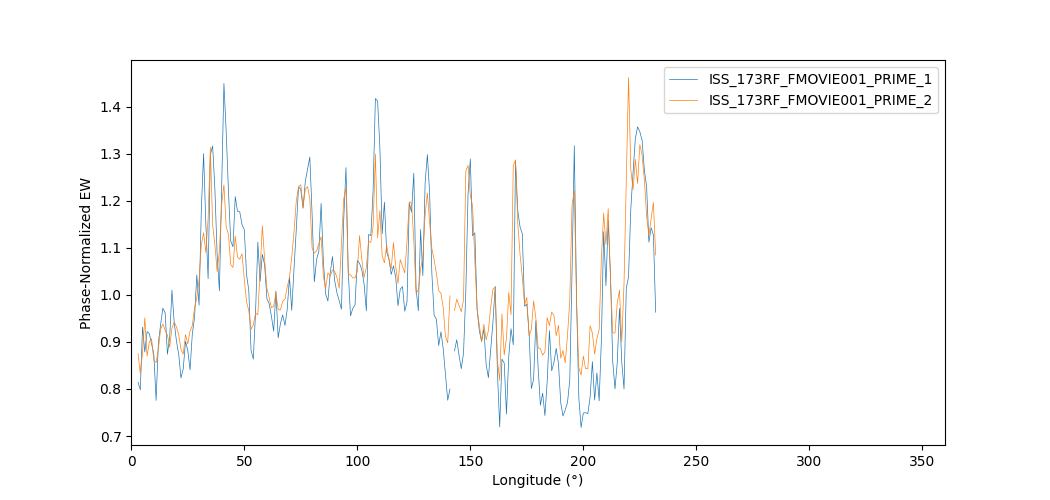

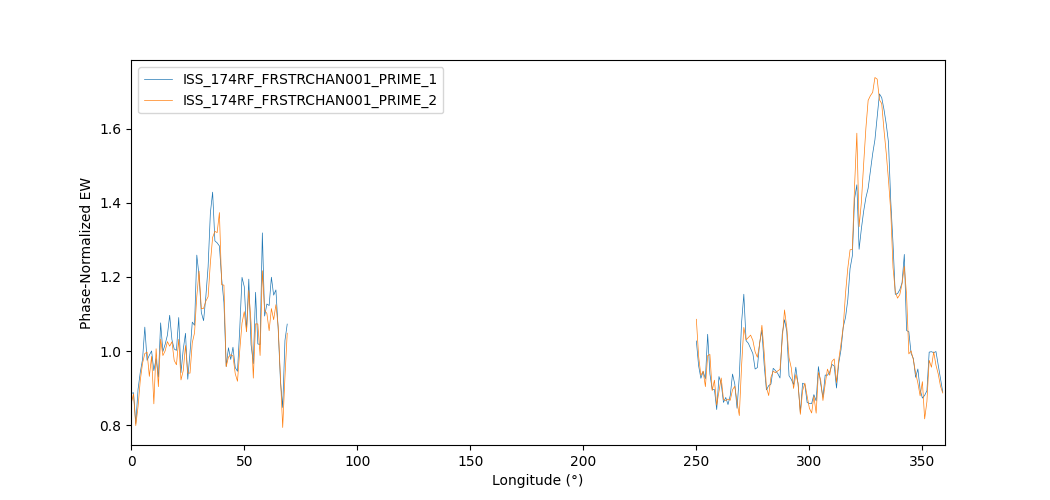

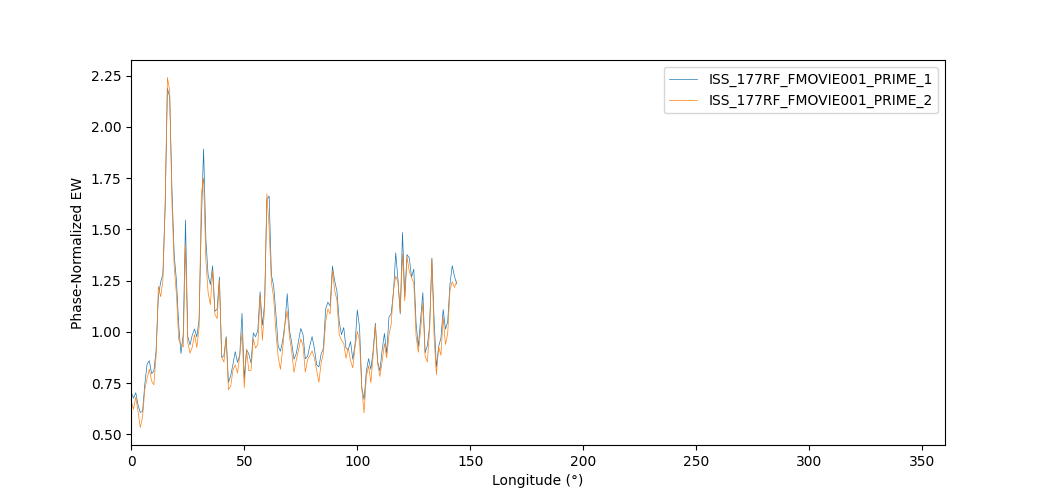

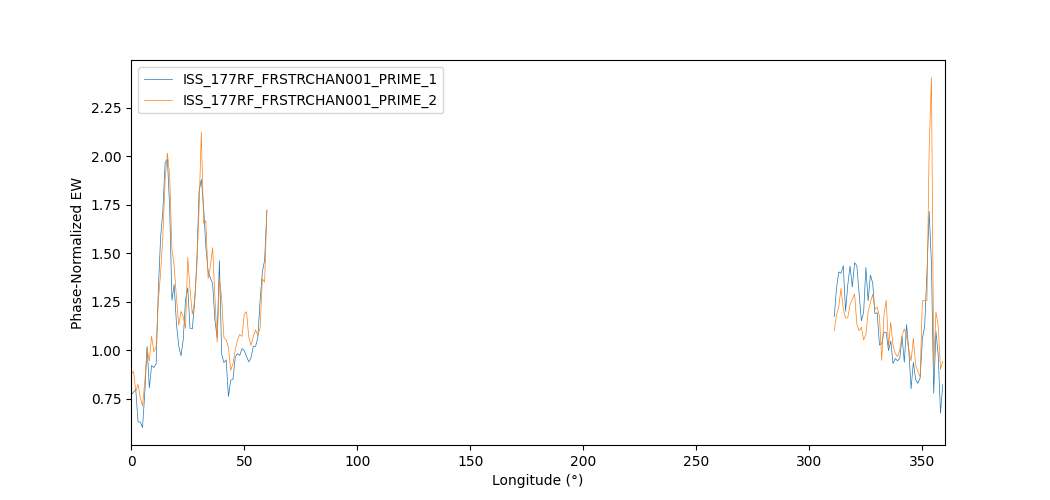

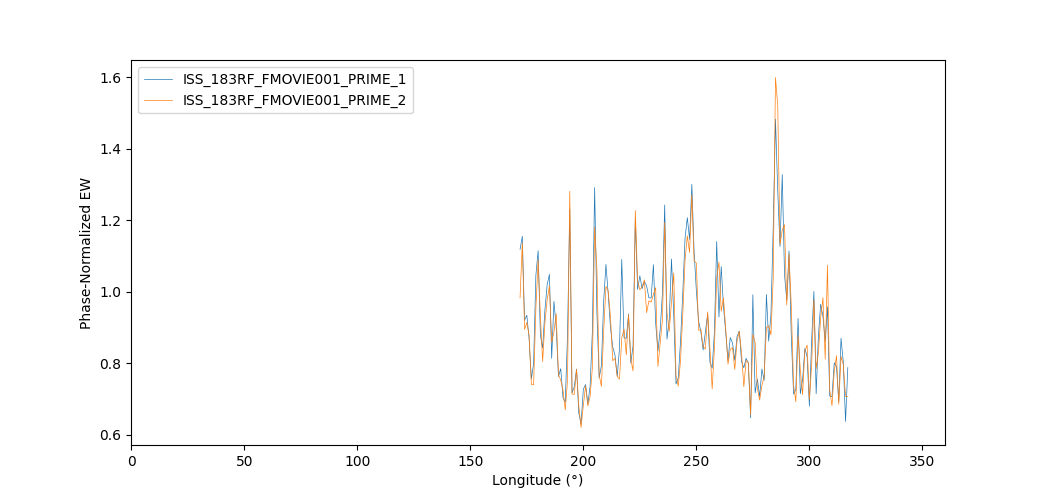

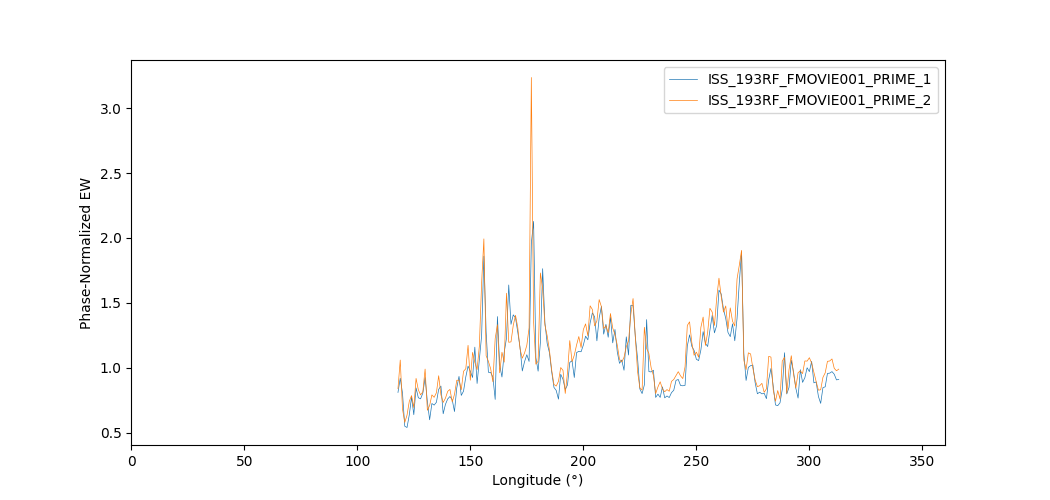

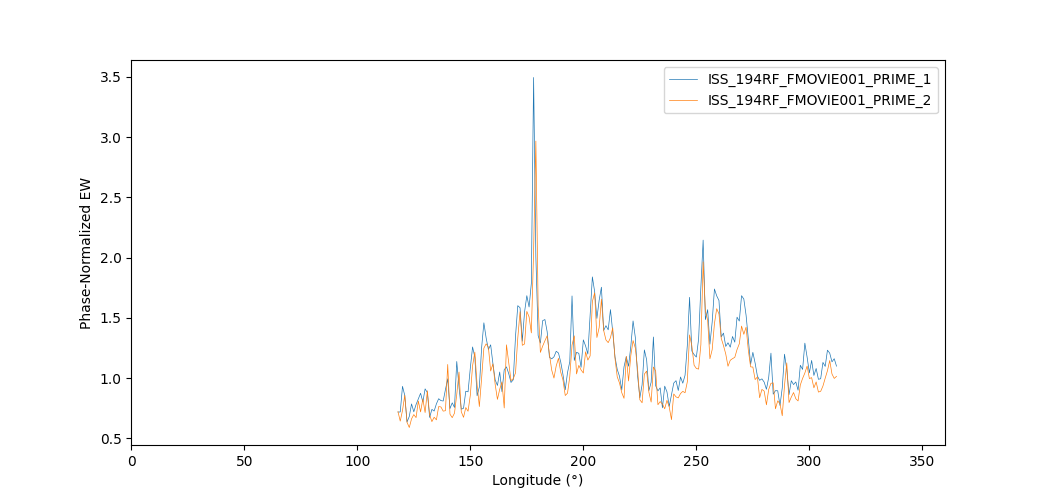

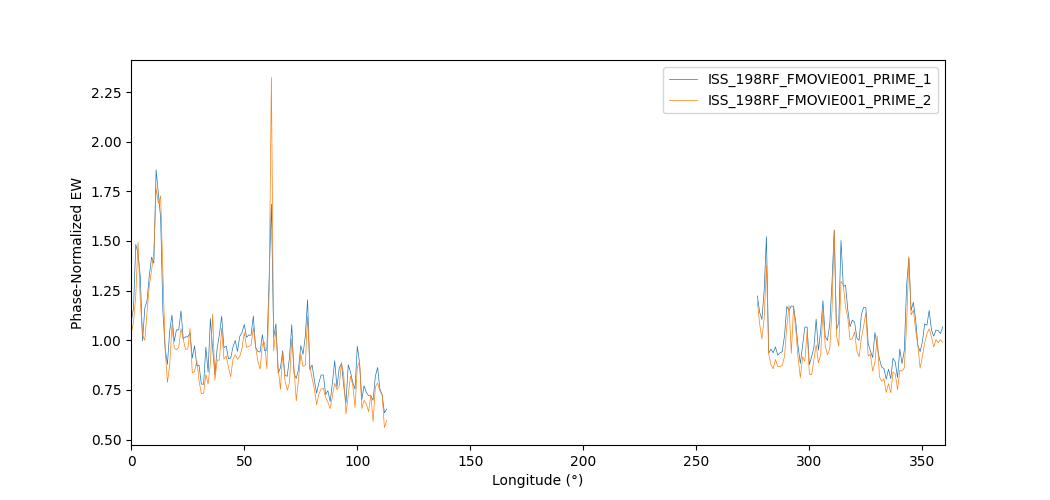

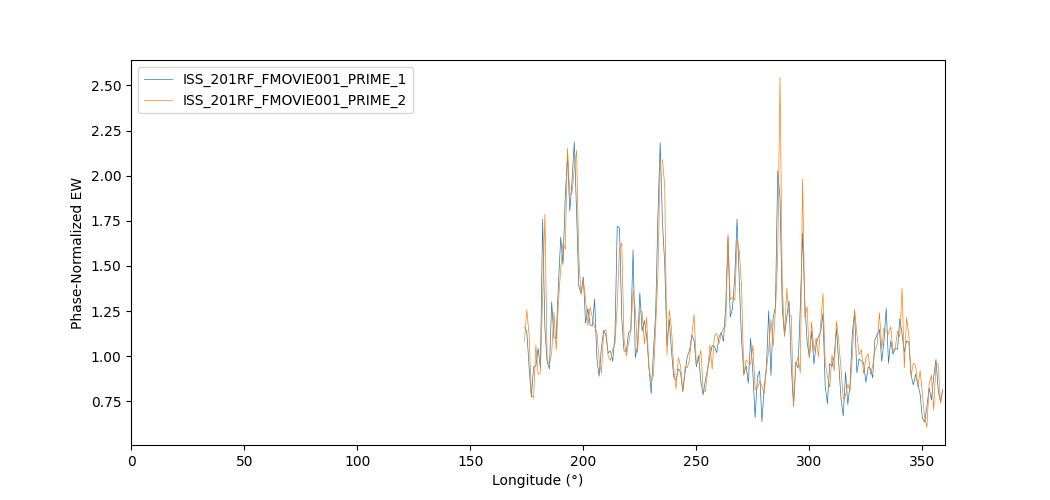

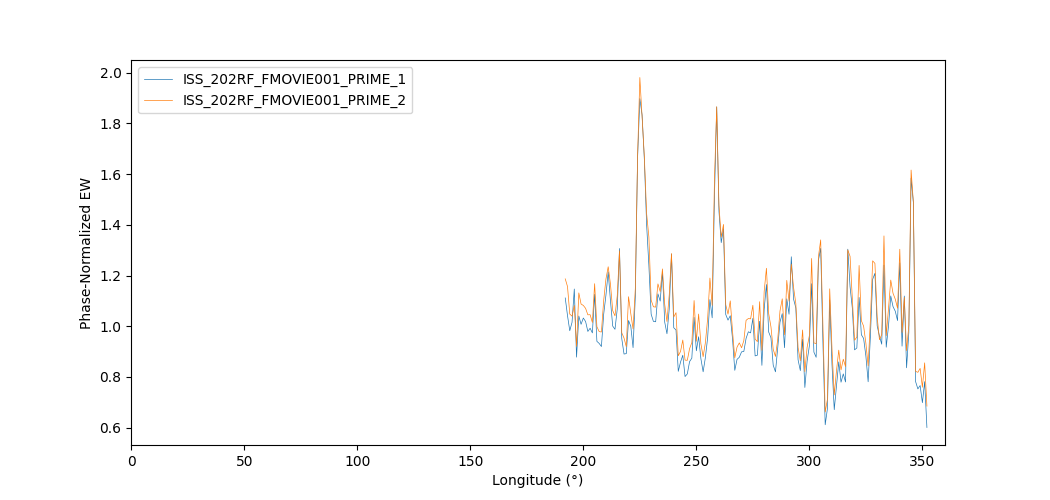

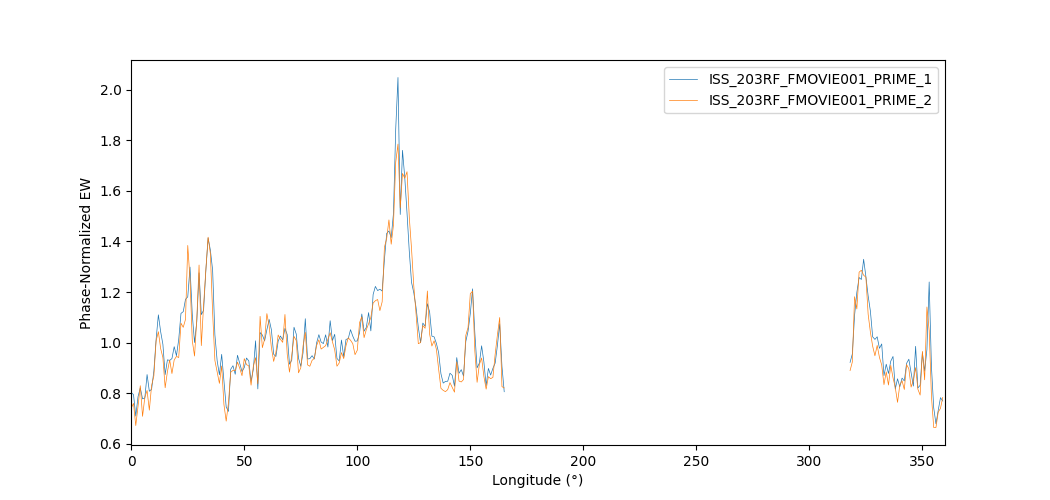

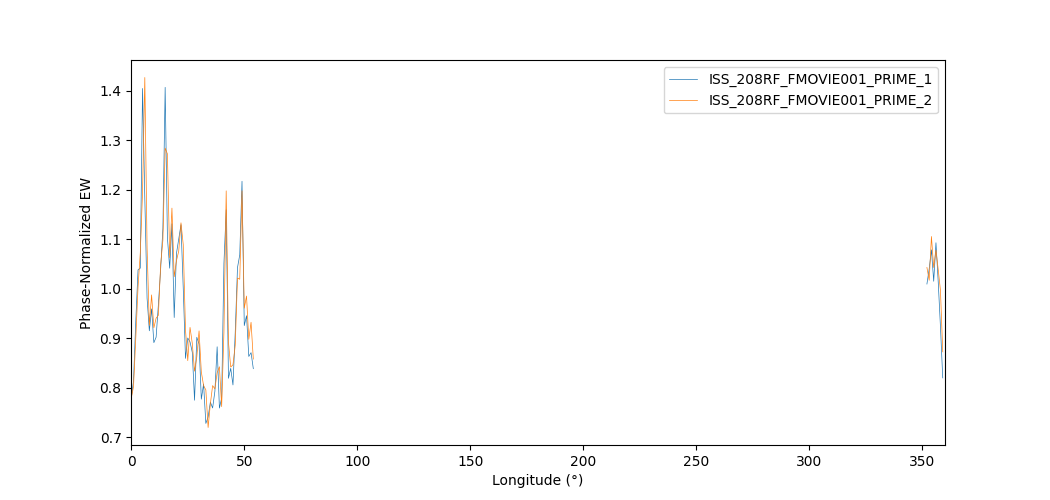

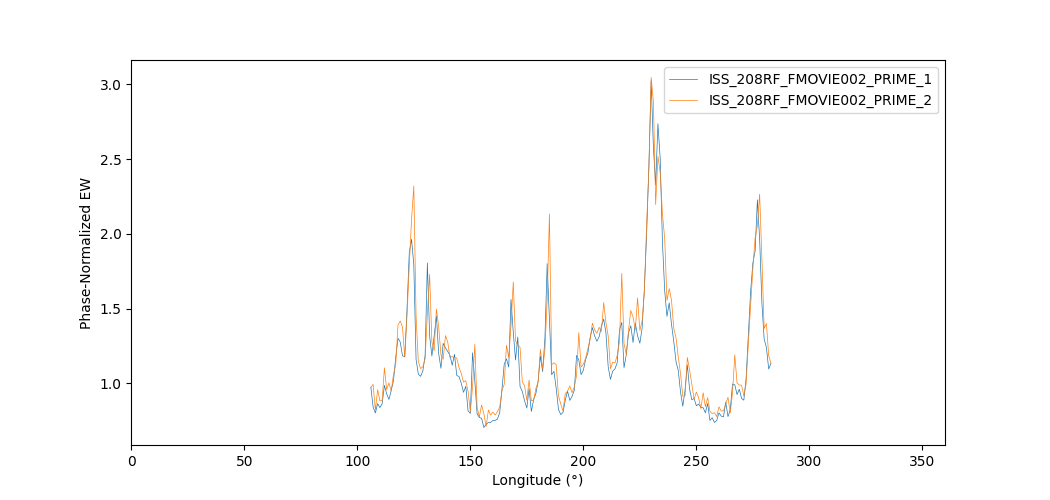

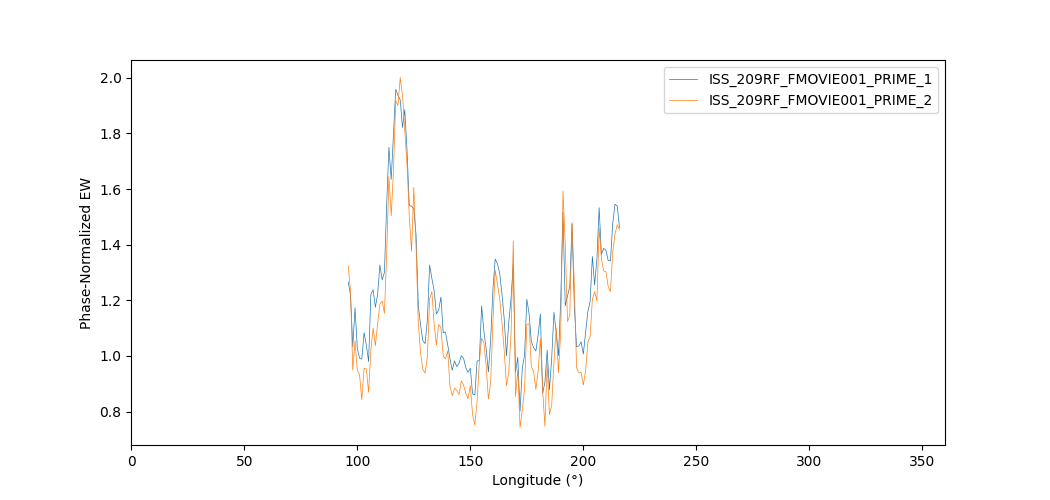

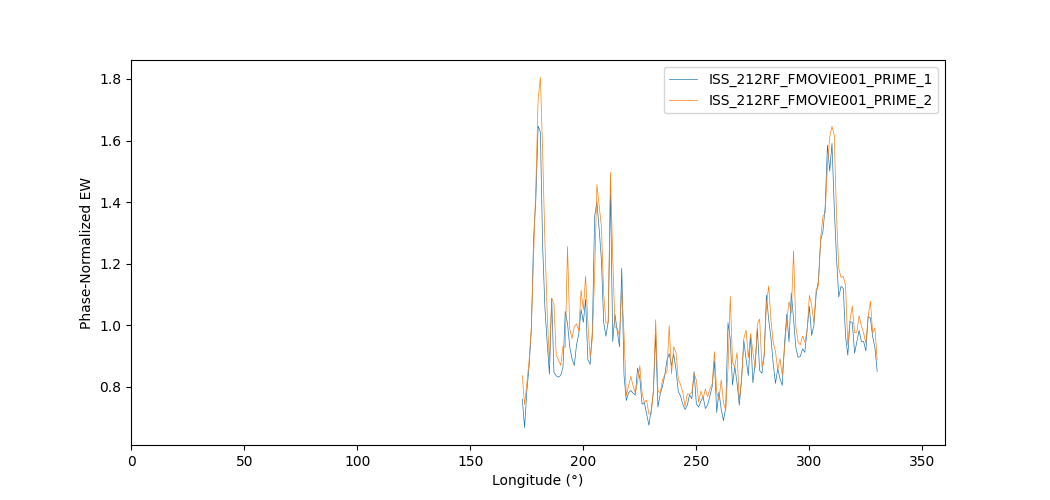

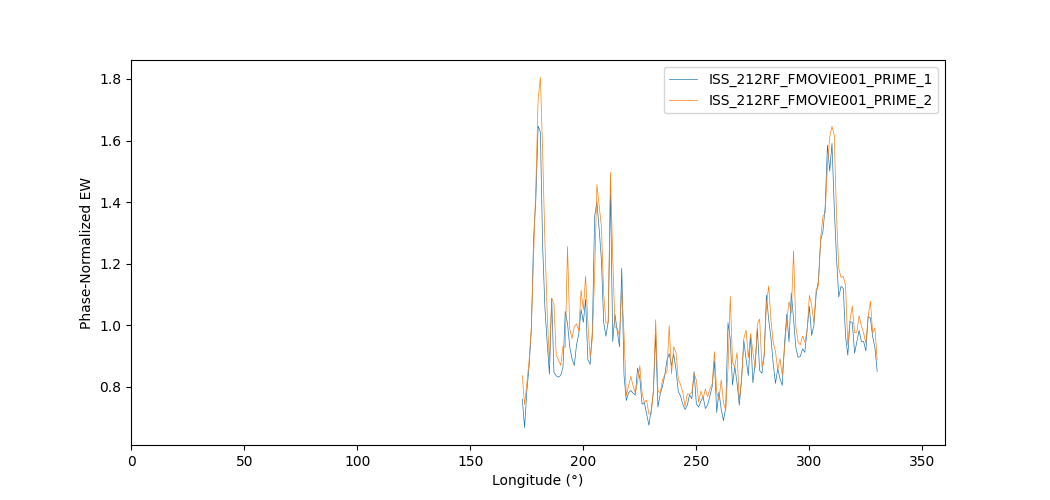

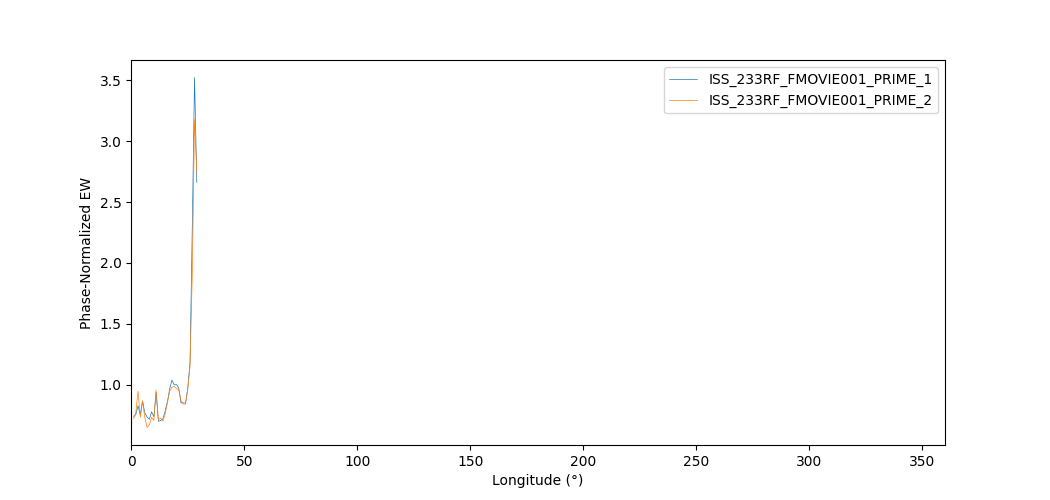

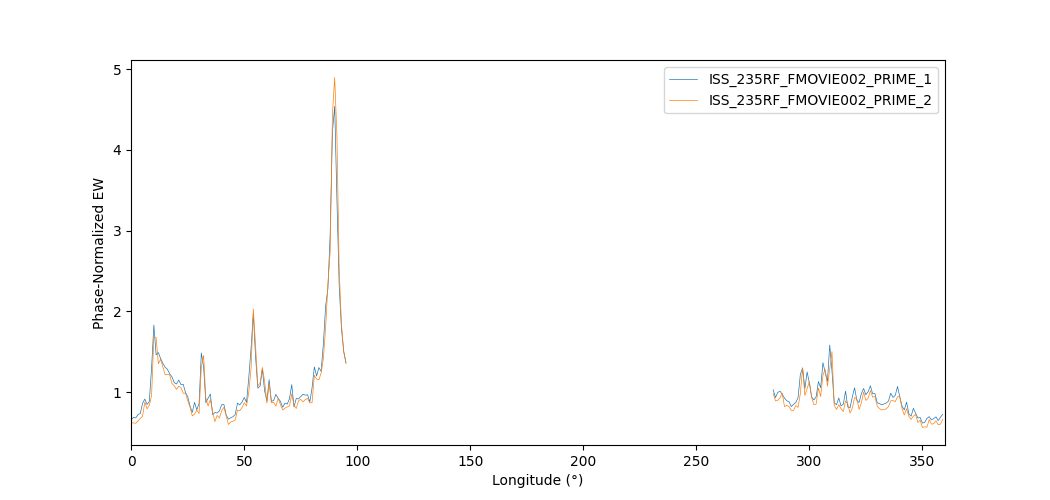

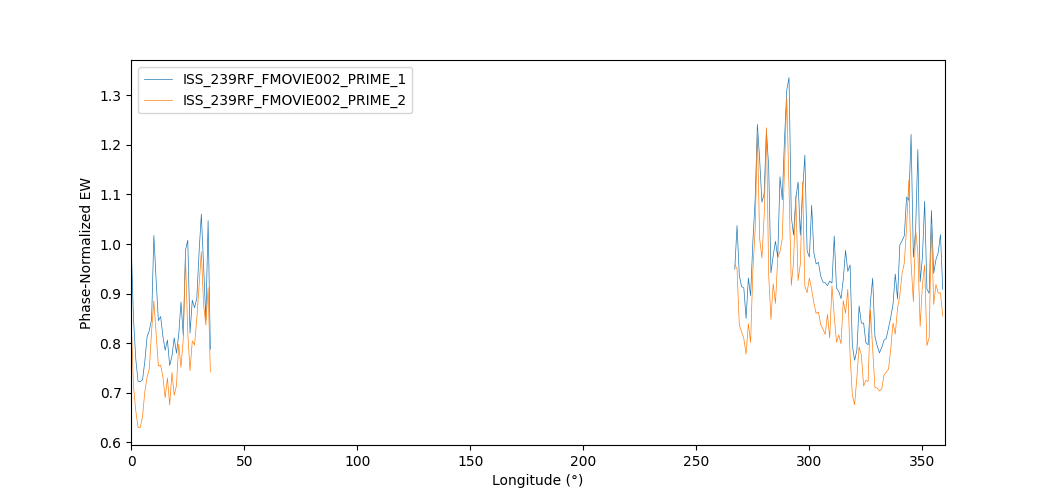

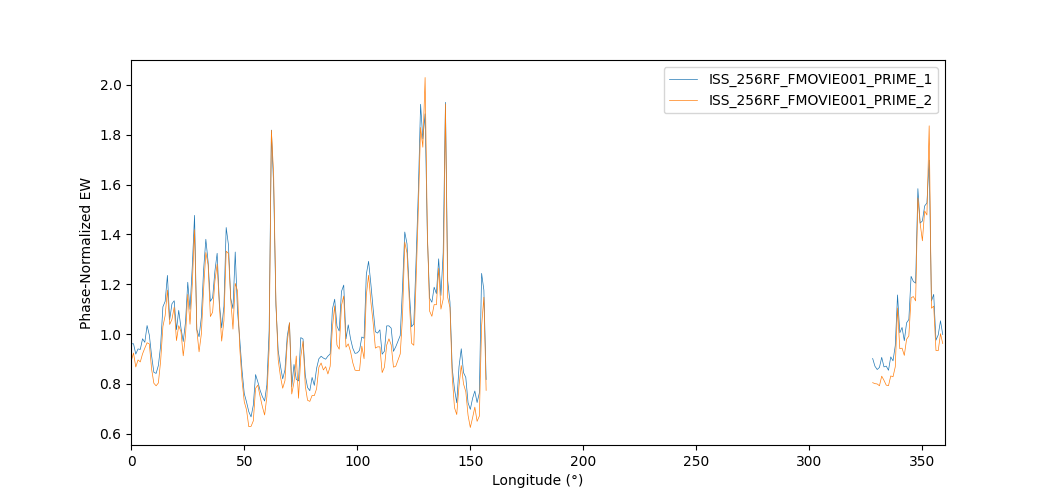

In [4]:
mosaic_pairs = (
    'ISS_085RF_FMOVIE003_PRIME',
    'ISS_094RF_FMOVIE001_PRIME',
    'ISS_112RF_FMOVIE002_PRIME',
    'ISS_173RF_FMOVIE001_PRIME',
    'ISS_174RF_FRSTRCHAN001_PRIME',
    'ISS_177RF_FMOVIE001_PRIME',
    'ISS_177RF_FRSTRCHAN001_PRIME',
    'ISS_183RF_FMOVIE001_PRIME',
    # 'ISS_185RI_RHYAOCC001_VIMS', # No overlap
    'ISS_193RF_FMOVIE001_PRIME',
    'ISS_194RF_FMOVIE001_PRIME',
    'ISS_198RF_FMOVIE001_PRIME',
    # 'ISS_201RI_L2PUPOCC001_VIMS', # No overlap
    'ISS_201RF_FMOVIE001_PRIME',
    'ISS_202RF_FMOVIE001_PRIME',
    'ISS_203RF_FMOVIE001_PRIME',
    'ISS_208RF_FMOVIE001_PRIME',
    'ISS_208RF_FMOVIE002_PRIME',
    'ISS_209RF_FMOVIE001_PRIME',
    'ISS_212RF_FMOVIE001_PRIME',
    'ISS_212RF_FMOVIE001_PRIME',
    # 'ISS_232RI_EGAPMOVMP001_PRIME', # Not currently selected for photometry
    'ISS_233RF_FMOVIE001_PRIME',
    'ISS_235RF_FMOVIE002_PRIME',
    # 'ISS_239RI_HIRESAFRG001_PRIME', # No overlap
    'ISS_239RF_FMOVIE002_PRIME',
    # 'ISS_243RF_FMOVIE001_PRIME', # Poor coverage, intermittent overlap
    # 'ISS_253RF_FMOVIE001_PRIME', # 123 - little overlap
    'ISS_256RF_FMOVIE001_PRIME',
    # 'ISS_268RF_FMOVIE001_PRIME', # 123 - little overlap
)

cutoff1 = 100
cutoff2 = None
obsdata_limited = limit_by_quant(obsdata_0_1, cutoff1, cutoff2)
params_limited, _, _ = fit_hg_phase_function(2, None, obsdata_limited)
obsdata_0_1['Phase Model'] = hg_func(params_limited, obsdata_0_1['Mean Phase'])
obsdata_0_1['PN Normal EW Mean'] = obsdata_0_1['Normal EW Mean'] / obsdata_0_1['Phase Model']
for pair_obsid_root in mosaic_pairs:
    pair_1 = obsdata_0_1.loc[pair_obsid_root+'_1']
    pair_2 = obsdata_0_1.loc[pair_obsid_root+'_2']
    pairs = pair_1.set_index('Slice#').join(pair_2.set_index('Slice#'), how='inner', rsuffix='_2')
    plt.figure()
    x, y = fill_in_missing_long(pairs['Min Long'].to_numpy(), pairs['PN Normal EW Mean'].to_numpy())
    plt.plot(x, y, lw=0.5, label=pair_obsid_root+'_1')
    x, y = fill_in_missing_long(pairs['Min Long'].to_numpy(), pairs['PN Normal EW Mean_2'].to_numpy())
    plt.plot(x, y, lw=0.5, label=pair_obsid_root+'_2')
    plt.legend()
    plt.xlim(0, 360)
    plt.xlabel('Longitude (°)')
    plt.ylabel('Phase-Normalized EW')


<div class="alert alert-info">
<h2>Conclusion</h2>

<b>XXX</b>
</div>
